In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [9]:
%run classes/music.py

In [10]:
music = Music()
music.read('sounds/wav/cello_pluck/expert/d3a3_copy3.wav')
notes = music.compile_music(window=3000, DIFF=3000)
len(notes)

1

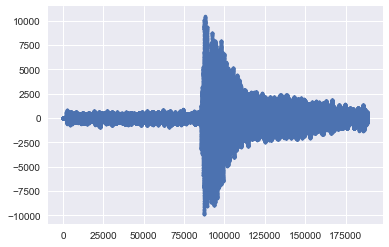

In [11]:
plt.plot(music.chan1, ".")

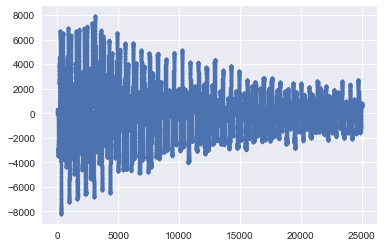

In [12]:
stub = music.chan1[95000:120000]
plt.plot(stub, ".")

(0, 1000)

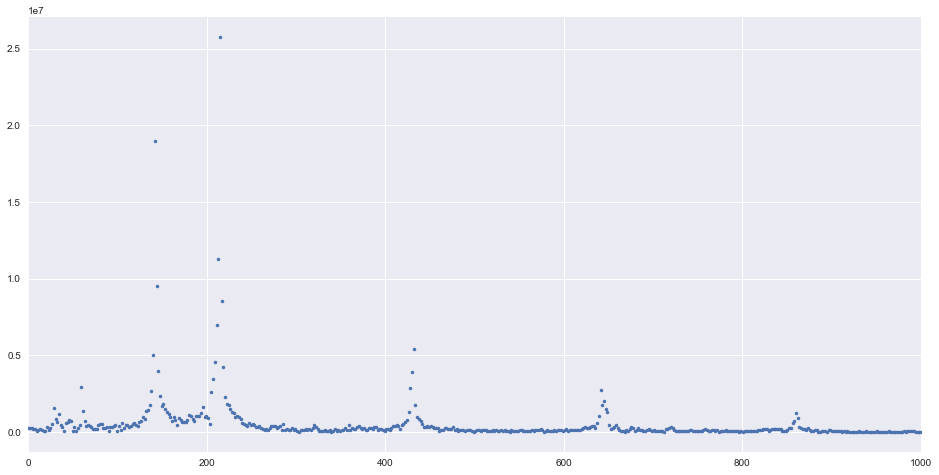

In [14]:
from scipy.fftpack import fft

fft_data = np.abs(fft(stub))

conversion_factor = music.sample_rate / len(fft_data)
x = [i * conversion_factor for i in range(len(fft_data))]

plt.figure(figsize=(16,8))
plt.plot(x, fft_data, ".")
plt.xlim(0, 1000)

# plt.axvline(65.4, color="k")
# plt.axvline(98, color="k")
# plt.axvline(146, color="k", linewidth=1)
# # plt.axvline(420, color="k")
# _ = plt.axvline(220, color="k")

In [10]:
music.save("/Users/pbezuhov/Desktop/output.xml")